In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

inc_file = '../../../tables/model_output/projections.csv'
dec_file = '../../../tables/model_output/dec_projections.csv'

inc_results = pd.read_csv(inc_file,index_col='noc',squeeze=True)
dec_results = pd.read_csv(dec_file,index_col='noc',squeeze=True)

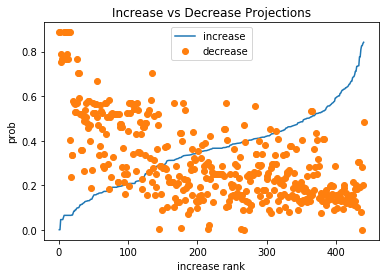

In [3]:
fig,ax = plt.subplots()

inc_results.sort_values(inplace=True) 
dec_results = dec_results[inc_results.index]

inc_line = ax.plot(range(1,441), inc_results, label='increase')
dec_line = ax.plot(range(1,441), dec_results,'o', label='decrease')

ax.set_ylabel('prob')
ax.set_xlabel('increase rank')
ax.set_title('Increase vs Decrease Projections')
ax.legend()

plt.savefig('inc compared to dec.png')
plt.show()

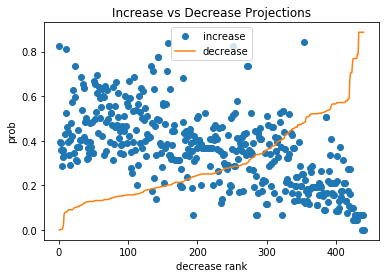

In [18]:
fig,ax = plt.subplots()

dec_results.sort_values(inplace=True) 
inc_results = inc_results[dec_results.index]

inc_line = ax.plot(range(1,441), inc_results,'o', label='increase')
dec_line = ax.plot(range(1,441), dec_results, label='decrease')

ax.set_ylabel('prob')
ax.set_xlabel('decrease rank')
ax.set_title('Increase vs Decrease Projections')
ax.legend()

plt.savefig('dec compared to inc.png')
plt.show()

In [42]:
np.arange(0,1,0.1)

array([0. , 0.2, 0.4, 0.6, 0.8])

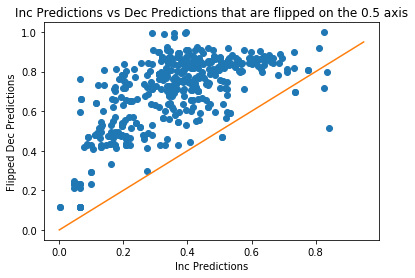

In [45]:
flipped_dec = dec_results - (dec_results-0.5)*2

plt.plot(inc_results,flipped_dec,'o')
plt.plot(np.arange(0,1,0.05),np.arange(0,1,0.05))
plt.title('Inc Predictions vs Dec Predictions that are flipped on the 0.5 axis')
plt.xlabel('Inc Predictions')
plt.ylabel('Flipped Dec Predictions')
plt.savefig('inc vs flipped dec.png')

In [13]:
inc_results.sort_index(inplace=True)
inc_scale = preprocessing.MinMaxScaler().fit_transform(np.asarray(inc_results).reshape(-1, 1))
inc_scale = pd.Series(np.hstack(inc_scale),index=inc_results.index)

dec_results.sort_index(inplace=True)
dec_scale = preprocessing.MinMaxScaler().fit_transform(np.asarray(dec_results).reshape(-1, 1))
dec_scale = pd.Series(np.hstack(dec_scale),index=dec_results.index)

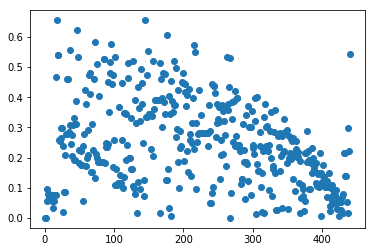

In [14]:
scaled_comparison = pd.concat([inc_scale,dec_scale,abs(inc_scale - (1-dec_scale))],axis=1)
scaled_comparison.sort_values(0,inplace=True)

plt.plot(range(1,441),scaled_comparison[2],'o')

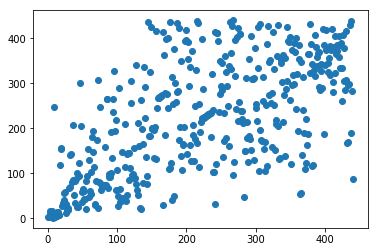

In [15]:
inc_rank = inc_results.rank(method='first',ascending = True)
dec_rank = dec_results.rank(method='first',ascending = False)

plt.plot(inc_rank,dec_rank,'o')

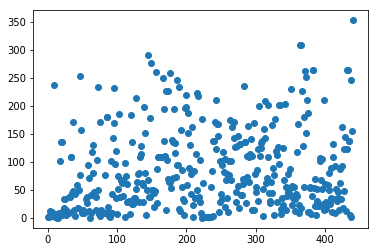

In [16]:
rank_comparison = pd.concat([inc_rank,dec_rank,abs(inc_rank - dec_rank)],axis=1)
rank_comparison.columns = ['increase_rank','inverse_decrease_rank','diff']
rank_comparison.sort_values('increase_rank',inplace=True)

plt.plot(range(1,441),rank_comparison['diff'],'o')